# Compare scale factors derived from Bragg and diffuse data

In [3]:
import json
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import gridspec, patches

from mdx2.utils import loadobj

# load DIALS report
with open('../processing/dials/report.json', 'r') as f:
    rept = json.load(f)
    
# extract DIALS scaling models and assign batch numbers
dials_models = []
for j in range(0,17):
    d = rept['scaling_model'][f'smooth_scale_model_{j}']['data'][0]
    dials_models.append(dict(
        scale = d['y'],
        batch = np.linspace(j*500,(j+1)*500,len(d['x'])),
    ))
    
# load mdx2 scaling models and assign batch numbers
mdx2_models = []
for j in range(0,17):
    sm = loadobj(f'../processing/mdx2/split_{j:02}/scales_all.nxs','scaling_model')
    x = sm.x
    mdx2_models.append(dict(
        scale=sm.u, 
        batch=500*(x-x[0])/(x[-1]-x[0]) + j*500,
    ))

Reading scaling_model from ../processing/mdx2/split_00/scales_all.nxs
  importing as ScalingModel from mdx2.scaling
Reading scaling_model from ../processing/mdx2/split_01/scales_all.nxs
  importing as ScalingModel from mdx2.scaling
Reading scaling_model from ../processing/mdx2/split_02/scales_all.nxs
  importing as ScalingModel from mdx2.scaling
Reading scaling_model from ../processing/mdx2/split_03/scales_all.nxs
  importing as ScalingModel from mdx2.scaling
Reading scaling_model from ../processing/mdx2/split_04/scales_all.nxs
  importing as ScalingModel from mdx2.scaling
Reading scaling_model from ../processing/mdx2/split_05/scales_all.nxs
  importing as ScalingModel from mdx2.scaling
Reading scaling_model from ../processing/mdx2/split_06/scales_all.nxs
  importing as ScalingModel from mdx2.scaling
Reading scaling_model from ../processing/mdx2/split_07/scales_all.nxs
  importing as ScalingModel from mdx2.scaling
Reading scaling_model from ../processing/mdx2/split_08/scales_all.nxs
  

## Figure S1

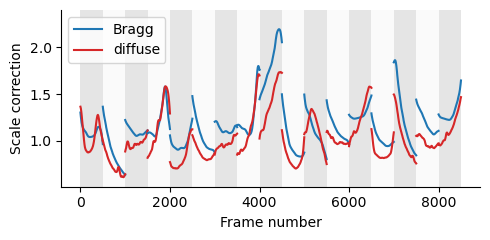

In [7]:
fig = plt.figure(figsize=(5,2.5))

ax1 = plt.subplot(1,1,1)

for j, (d, m) in enumerate(zip(dials_models, mdx2_models)):
    ax1.plot(d['batch'],d['scale'],'tab:blue')
    ax1.plot(m['batch'],m['scale'],'tab:red')
    
    if j % 2:
        fc = (0,0,0,.02)
    else:
        fc = (0,0,0,.1)
    ax1.add_patch(patches.Rectangle((j*500, 0), 500, 3,facecolor=fc,edgecolor=None))

ax1.set_ylim(0.51,2.4)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.set_ylabel('Scale correction')
ax1.set_xlabel('Frame number')
ax1.legend(['Bragg','diffuse'])
plt.tight_layout()

!mkdir -p figures
fig.savefig('figures/figs1.pdf',transparent=True)